In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('New_Data_Soft_Solution.csv')
df

,sgd_num,sgd_date,importer_tin,declarant_code,office_cod,cty_origin,selected_colour,query_flag,nature_transaction,total_item_tax,...,net_mass,prc_nat,prc_ext,rat_customs_duty,mop,typ,hscode,container_no,mot_cod,status
0,C1,01/01/2023,21362735-0001,C5320RC1514804,01TC,United States,Green,NaN,NaN,1902451,...,1850.0,846,4100,20,NaN,NaN,8703332000,NaN,1.0,Exited
1,C2,01/01/2023,22583426-0001,C5238RC1514968,01TC,United States,Green,NaN,NaN,818866,...,1420.0,0,4100,20,NaN,NaN,8703332000,NaN,1.0,Exited
2,C1,01/01/2023,12300359,C0957RC142420,05EN,Ethiopia,Red,NaN,NaN,0,...,49.0,404,4100,0,NaN,NaN,6309000000,NaN,4.0,Selected
3,C1,01/01/2023,00281516-0001,C5770RC901568,06OY,Brazil,Green,NaN,NaN,32888227,...,20000.0,0,4080,5,NaN,NaN,2401200000,0.0,NaN,Cleared
4,C1,01/01/2023,00281516-0001,C5770RC901568,06OY,Brazil,Green,NaN,NaN,32888227,...,20000.0,0,4080,5,NaN,NaN,2401200000,1.0,NaN,Cleared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57842,C999,10/01/2023,23293900-0001,C5226RC1616551,05PN,China,Green,NaN,NaN,4040355,...,1000.0,0,4000,10,NaN,NaN,3918100000,1.0,1.0,Exited
57843,C999,10/01/2023,23293900-0001,C5226RC1616551,05PN,China,Green,NaN,NaN,4040355,...,1000.0,0,4000,20,NaN,NaN,3918100000,1.0,1.0,Exited
57844,C999,10/01/2023,23293900-0001,C5226RC1616551,05PN,China,Green,NaN,NaN,4040355,...,7780.0,0,4000,10,NaN,NaN,9031800000,1.0,1.0,Exited
57845,C999,10/01/2023,23293900-0001,C5226RC1616551,05PN,China,Green,NaN,NaN,4040355,...,7780.0,0,4000,20,NaN,NaN,9031800000,1.0,1.0,Exited


In [2]:
df.status.unique()

array(['Exited', 'Selected', 'Cleared', 'Assessed', 'Partially Exited',
       'Cancelled'], dtype=object)

In [3]:
df.isna().sum()

sgd_num                               0
sgd_date                              0
importer_tin                          0
declarant_code                        0
office_cod                            0
cty_origin                            0
selected_colour                      16
query_flag                        50881
nature_transaction                57847
total_item_tax                        0
total_assed_before_selectivity       10
global_tax                            0
gross_mass                            0
cif                                   0
number_items                          0
number_of_packages                    0
dpa_nam                               5
fobval                                0
item_tax                              0
statastical_value                     0
net_mass                              0
prc_nat                               0
prc_ext                               0
rat_customs_duty                      0
mop                               55483


In [4]:
df.dropna(subset='dpa_nam', inplace=True)

In [5]:
df.isnull().sum()

sgd_num                               0
sgd_date                              0
importer_tin                          0
declarant_code                        0
office_cod                            0
cty_origin                            0
selected_colour                      16
query_flag                        50876
nature_transaction                57842
total_item_tax                        0
total_assed_before_selectivity       10
global_tax                            0
gross_mass                            0
cif                                   0
number_items                          0
number_of_packages                    0
dpa_nam                               0
fobval                                0
item_tax                              0
statastical_value                     0
net_mass                              0
prc_nat                               0
prc_ext                               0
rat_customs_duty                      0
mop                               55478


In [6]:
df.query_flag.unique()

array([nan,  1.])

In [7]:
# Data cleaning and preprocessing
df.drop(columns=['nature_transaction', 'sgd_date', 'sgd_num'], inplace=True)
df['selected_colour'].fillna('Unknown', inplace=True)
df.fillna(0, inplace=True)
df['mop'].fillna(0, inplace=True)
df['typ'].fillna('Unknown', inplace=True)

In [8]:
df.query_flag.unique()

array([0., 1.])

In [9]:
df.isna().sum()

importer_tin                      0
declarant_code                    0
office_cod                        0
cty_origin                        0
selected_colour                   0
query_flag                        0
total_item_tax                    0
total_assed_before_selectivity    0
global_tax                        0
gross_mass                        0
cif                               0
number_items                      0
number_of_packages                0
dpa_nam                           0
fobval                            0
item_tax                          0
statastical_value                 0
net_mass                          0
prc_nat                           0
prc_ext                           0
rat_customs_duty                  0
mop                               0
typ                               0
hscode                            0
container_no                      0
mot_cod                           0
status                            0
dtype: int64

In [10]:
df.dtypes[df.dtypes == 'float64']

query_flag                        float64
total_assed_before_selectivity    float64
gross_mass                        float64
net_mass                          float64
mop                               float64
container_no                      float64
mot_cod                           float64
dtype: object

In [11]:
df.dtypes[df.dtypes == 'int64']

total_item_tax        int64
global_tax            int64
cif                   int64
number_items          int64
number_of_packages    int64
fobval                int64
item_tax              int64
statastical_value     int64
prc_nat               int64
prc_ext               int64
rat_customs_duty      int64
hscode                int64
dtype: object

In [12]:
df.dtypes[df.dtypes == 'object' ]

importer_tin       object
declarant_code     object
office_cod         object
cty_origin         object
selected_colour    object
dpa_nam            object
typ                object
status             object
dtype: object

In [13]:
df.columns

Index(['importer_tin', 'declarant_code', 'office_cod', 'cty_origin',
       'selected_colour', 'query_flag', 'total_item_tax',
       'total_assed_before_selectivity', 'global_tax', 'gross_mass', 'cif',
       'number_items', 'number_of_packages', 'dpa_nam', 'fobval', 'item_tax',
       'statastical_value', 'net_mass', 'prc_nat', 'prc_ext',
       'rat_customs_duty', 'mop', 'typ', 'hscode', 'container_no', 'mot_cod',
       'status'],
      dtype='object')

In [14]:
# Define features and target
X = df.drop(columns=['query_flag'])  # Features
y = df['query_flag']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Non-numeric and numeric columns
non_numeric_columns = ['importer_tin', 'declarant_code', 'office_cod', 'cty_origin', 
                       'selected_colour', 'hscode', 'mot_cod', 'typ', 'status', 
                       'dpa_nam', 'rat_customs_duty', 'prc_ext']
numeric_columns = [col for col in X.columns if col not in non_numeric_columns]

# Ensure non-numeric columns are treated as categorical
X_train[non_numeric_columns] = X_train[non_numeric_columns].astype(str)
X_test[non_numeric_columns] = X_test[non_numeric_columns].astype(str)

In [16]:
# Label encoding for non-numeric columns
def fit_and_transform_le(df_train, df_test, columns):
    for col in columns:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col].astype(str))
        
        # Handling unseen labels in the test set
        test_categories = set(df_test[col].astype(str).unique())
        train_categories = set(le.classes_)
        
        unseen_categories = test_categories - train_categories
        if unseen_categories:
            # Add unseen categories to the encoder
            le.classes_ = np.append(le.classes_, list(unseen_categories))
        
        df_test[col] = le.transform(df_test[col].astype(str))
        
    return df_train, df_test

# Apply label encoding
X_train, X_test = fit_and_transform_le(X_train, X_test, non_numeric_columns)

# Scaling for numeric columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Combine scaled and encoded features, retaining original column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

#### 2. Feature Selection with Firefly Algorithm

We'll implement the Firefly Algorithm to select features by optimizing a simple objective function based on feature importance or correlation with the target.

**Firefly Algorithm for Feature Selection**:

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the Firefly Algorithm
def firefly_algorithm(X, y, feature_names, n_fireflies=20, max_iter=50, alpha=0.5, beta0=1, gamma=1):
    num_features = X.shape[1]
    selection_counts = np.zeros(num_features)  # Track selection counts

    def initialize_fireflies(n_fireflies, num_features):
        return np.random.randint(2, size=(n_fireflies, num_features))

    def attractiveness(firefly_i, firefly_j, gamma):
        return beta0 * np.exp(-gamma * np.linalg.norm(firefly_i - firefly_j)**2)

    def move_firefly(firefly_i, firefly_j, alpha, beta):
        return firefly_i + beta * (firefly_j - firefly_i) + alpha * (np.random.rand(len(firefly_i)) - 0.5)

    def evaluate_firefly(firefly):
        selected_features = np.where(firefly == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X[:, selected_features]
        model = LogisticRegression(solver='liblinear')
        model.fit(X_selected, y)
        y_pred = model.predict(X_selected)
        return accuracy_score(y, y_pred)

    fireflies = initialize_fireflies(n_fireflies, num_features)
    for t in range(max_iter):
        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if i != j:
                    if evaluate_firefly(fireflies[j]) > evaluate_firefly(fireflies[i]):
                        beta = attractiveness(fireflies[i], fireflies[j], gamma)
                        fireflies[i] = move_firefly(fireflies[i], fireflies[j], alpha, beta)
                        fireflies[i] = np.clip(fireflies[i], 0, 1)  # Ensure binary values

        # Track feature selection
        for firefly in fireflies:
            selection_counts += firefly

    best_firefly = fireflies[np.argmax([evaluate_firefly(f) for f in fireflies])]

    # Calculate selection percentages
    selection_percentages = (selection_counts / (n_fireflies * max_iter)) * 100
    selected_features = np.where(best_firefly == 1)[0]
    selected_feature_names = feature_names[selected_features]
    non_selected_feature_names = feature_names[~np.isin(range(num_features), selected_features)]

    # Print feature selection results
    print("Selected Features:")
    for feature in selected_feature_names:
        print(f"{feature}: Yes ({selection_percentages[feature_names == feature][0]:.2f}%)")

    print("\nNon-Selected Features:")
    for feature in non_selected_feature_names:
        print(f"{feature}: No ({selection_percentages[feature_names == feature][0]:.2f}%)")

    return best_firefly, selection_percentages

# Feature names
feature_names = X_train.columns.values

# Run Firefly Algorithm
best_features, selection_percentages = firefly_algorithm(X_train.values, y_train.values, feature_names)

Selected Features:
importer_tin: Yes (5.30%)
office_cod: Yes (5.10%)
cty_origin: Yes (5.10%)
total_item_tax: Yes (5.10%)
total_assed_before_selectivity: Yes (5.00%)
fobval: Yes (5.20%)
statastical_value: Yes (5.00%)
net_mass: Yes (5.00%)
prc_nat: Yes (5.00%)
rat_customs_duty: Yes (5.00%)
mop: Yes (5.00%)
mot_cod: Yes (5.40%)
status: Yes (5.00%)

Non-Selected Features:
declarant_code: No (0.20%)
selected_colour: No (0.00%)
global_tax: No (0.20%)
gross_mass: No (0.00%)
cif: No (0.00%)
number_items: No (0.40%)
number_of_packages: No (0.00%)
dpa_nam: No (0.00%)
item_tax: No (0.10%)
prc_ext: No (0.00%)
typ: No (0.70%)
hscode: No (0.00%)
container_no: No (0.10%)


#### 3. Neural Network Optimization with Genetic Algorithm

Using GA to optimize the weights of a neural network trained on selected features.

**Genetic Algorithm for Neural Network Optimization**:

In [28]:
# Neural Network using Genetic Algorithm
def create_nn(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def genetic_algorithm(X, y, input_dim, population_size=20, generations=10, mutation_rate=0.1):
    def initialize_population(population_size, input_dim):
        return [create_nn(input_dim) for _ in range(population_size)]

    def evaluate_population(population, X, y):
        scores = []
        for model in population:
            model.fit(X, y, epochs=10, verbose=0)
            score = model.evaluate(X, y, verbose=0)[1]  # Using accuracy
            scores.append(score)
        return scores

    def crossover(parent1, parent2):
        child1 = create_nn(input_dim)
        child2 = create_nn(input_dim)
        for layer in range(len(parent1.layers)):
            weights1, biases1 = parent1.layers[layer].get_weights()
            weights2, biases2 = parent2.layers[layer].get_weights()
            midpoint = weights1.shape[1] // 2
            new_weights1 = np.concatenate((weights1[:, :midpoint], weights2[:, midpoint:]), axis=1)
            new_weights2 = np.concatenate((weights2[:, :midpoint], weights1[:, midpoint:]), axis=1)
            child1.layers[layer].set_weights([new_weights1, biases1])
            child2.layers[layer].set_weights([new_weights2, biases2])
        return child1, child2

    def mutate(model, mutation_rate):
        for layer in model.layers:
            weights, biases = layer.get_weights()
            if np.random.rand() < mutation_rate:
                weights += np.random.normal(0, 0.1, weights.shape)
            layer.set_weights([weights, biases])

    population = initialize_population(population_size, input_dim)
    for generation in range(generations):
        scores = evaluate_population(population, X, y)
        print(f"Generation {generation + 1} best accuracy: {max(scores):.4f}")
        new_population = []
        for i in range(population_size // 2):
            parent1, parent2 = select_parents(population, scores)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population
    best_model = population[np.argmax(scores)]
    return best_model

def select_parents(population, scores):
    idx = np.argsort(scores)
    return population[idx[-1]], population[idx[-2]]


4. Combining FA and GA
First, use the Firefly Algorithm for feature selection, then pass the selected features to the Genetic Algorithm to optimize the neural network.

In [29]:
# Select features using best firefly
selected_features_idx = np.where(best_features == 1)[0]
X_train_selected = X_train.iloc[:, selected_features_idx].values
X_test_selected = X_test.iloc[:, selected_features_idx].values

# Neural Network Optimization using GA
best_nn = genetic_algorithm(X_train_selected, y_train, input_dim=X_train_selected.shape[1])

# Evaluate the best neural network model on the test set
test_loss, test_accuracy = best_nn.evaluate(X_test_selected, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f'Test Loss: {test_loss}')

Generation 1 best accuracy: 0.9079
Generation 2 best accuracy: 0.9175
Generation 3 best accuracy: 0.9217
Generation 4 best accuracy: 0.9235
Generation 5 best accuracy: 0.9244
Generation 6 best accuracy: 0.9252
Generation 7 best accuracy: 0.9268
Generation 8 best accuracy: 0.9251
Generation 9 best accuracy: 0.9262
Generation 10 best accuracy: 0.9286
Test accuracy: 0.9263
Test Loss: 0.1820094734430313


362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     10166
         1.0       0.89      0.44      0.59      1403

    accuracy                           0.93     11569
   macro avg       0.91      0.72      0.78     11569
weighted avg       0.92      0.93      0.92     11569

Confusion Matrix:
[[10092    74]
 [  779   624]]


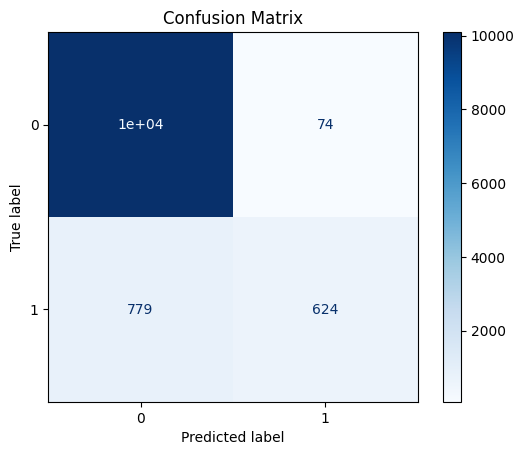

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict probabilities with the best neural network model
y_pred = best_nn.predict(X_test_selected)

# Convert probabilities to binary predictions
y_pred_class = (y_pred > 0.5).astype(int)

# Generate the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()